## Aaron Bowl

On 1/16/21 in the first game of the NFL Divisional Playoffs, the Green Bay Packers will face the Los Angeles Rams.
These teams represent the NFL's top ranked defense (Rams) and offense (Packers).
Interestingly the best player on each team is named Aaron. Aaron Rodgers is possibly the best quarterback in football and he is one of the hot favorites for this year's Most Valuable Player award. Aaron Donald is one of the best ever to play his position. He is one of three favorites for this year's Defensive Player of Year. Throw in the Packer's running back Aaron Jones as well. No matter how this game turns out it will be highly influenced by one the Aarons. That's why I'm calling it the Aaron Bowl

### Loading Data

Data sources: <br>
https://www.kaggle.com/c/nfl-big-data-bowl-2020 <br>
https://www.nfl.com/stats/player-stats/ <br>
https://www.pro-football-reference.com/

Note:
Unfortunately, none of these sources of data are completely open-source.
Kaggle allows “Competition Use, Non-Commercial, and Academic Use Only.” NFL.com data is “solely for your own individual non-commercial and informational purposes only.” Pro Football Reference has the most open data, “we encourage the sharing and reuse of data and statistics our users find on our Site” but warns not “to copy a materially significant portion of our data” — so no scraping.

In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pyplot import scatter

In [3]:
# import NFL stats
df = pd.read_csv (r'NFL_players.csv')
df.head()

,Player,First,Last,Suffix,Current Team,Position,Group,height,weight,birthdate,college,Pass_Yd,QB_rating,Pass_TD,Rush_Yd,Receive_Yd,Receive_TD,Sacks
0,Mario Addison,Mario,Addison,NaN,Buffalo Bills,DE,Tackle,75.0,260.0,09/06/1987,Troy,NaN,NaN,NaN,NaN,NaN,NaN,5.0
1,Zach Allen,Zach,Allen,NaN,Arizona Cardinals,DE,Tackle,77.0,285.0,08/20/1997,Boston College,NaN,NaN,NaN,NaN,NaN,NaN,2.0
2,Bradlee Anae,Bradlee,Anae,NaN,Dallas Cowboys,DE,Tackle,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Henry Anderson,Henry,Anderson,NaN,New York Jets,DE,Tackle,78.0,301.0,08/03/1991,Stanford,NaN,NaN,NaN,NaN,NaN,NaN,0.5
4,Arik Armstead,Arik,Armstead,NaN,San Francisco 49ers,DE,Tackle,79.0,292.0,11/15/1993,Oregon,NaN,NaN,NaN,NaN,NaN,NaN,3.5


### Investigate the Data

In [4]:
df.describe()

,height,weight,Pass_Yd,QB_rating,Pass_TD,Rush_Yd,Receive_Yd,Receive_TD,Sacks
count,656.000000,656.000000,38.000000,38.000000,38.000000,111.000000,364.000000,364.000000,225.000000
mean,74.237805,242.364329,2965.342105,92.455263,20.447368,460.234234,328.719780,2.153846,3.513333
std,2.657239,38.642537,1347.477970,13.466368,12.426426,342.629430,324.742973,2.747092,2.986547
min,66.000000,170.000000,624.000000,54.500000,2.000000,99.000000,4.000000,0.000000,0.500000
25%,73.000000,213.000000,1902.750000,81.250000,9.250000,197.500000,80.750000,0.000000,1.000000
50%,75.000000,238.000000,2942.500000,94.200000,18.000000,367.000000,208.500000,1.000000,2.500000
75%,76.000000,265.000000,4152.500000,102.000000,30.000000,649.000000,472.500000,3.000000,5.000000
max,80.000000,366.000000,4823.000000,121.500000,48.000000,2027.000000,1535.000000,18.000000,15.000000


In [5]:
df.dtypes

Player           object
First            object
Last             object
Suffix           object
Current Team     object
Position         object
Group            object
height          float64
weight          float64
birthdate        object
college          object
Pass_Yd         float64
QB_rating       float64
Pass_TD         float64
Rush_Yd         float64
Receive_Yd      float64
Receive_TD      float64
Sacks           float64
dtype: object

In [6]:
# convert birthdate to date time
df['birthdate'] = pd.to_datetime(df['birthdate'])

### Notes on the Data

There are six active Aarons in the NFL. Aaron Donald, Aaron Rodgers, Aaron Jones, Aaron Lynch, Aaron Brewer and Aaron Stinnie.
In this analysis I'm am focusing on seven positions: QB, WR, RB, TE (offense) and DE, DT, OLB (defense). These positions earn the bulk of measurable statistics on Passing, Rushing, Receiving and Sacks. There are certainly other measures - but these are what I am primarily focussed on.

* There are four Aarons in QB, WR, RB, TE, DE, DT, OLB positions

In [8]:
# Active Aarons
df_Aaron = df[df['First'] == 'Aaron']
df_Aaron

,Player,First,Last,Suffix,Current Team,Position,Group,height,weight,birthdate,college,Pass_Yd,QB_rating,Pass_TD,Rush_Yd,Receive_Yd,Receive_TD,Sacks
36,Aaron Donald,Aaron,Donald,NaN,Los Angeles Rams,DE,Tackle,73.0,280.0,1991-05-23,Pittsburgh,NaN,NaN,NaN,NaN,NaN,NaN,13.5
320,Aaron Lynch,Aaron,Lynch,NaN,Jacksonville Jaguars,OLB,Tackle,77.0,285.0,1993-02-08,South Florida,NaN,NaN,NaN,NaN,NaN,NaN,1.0
425,Aaron Rodgers,Aaron,Rodgers,NaN,Green Bay Packers,QB,Passing,74.0,225.0,1983-12-02,California,4299.0,121.5,48.0,149.0,NaN,NaN,NaN
532,Aaron Jones,Aaron,Jones,NaN,Green Bay Packers,RB,Rush,69.0,208.0,1994-12-02,Texas-El Paso,NaN,NaN,NaN,1104.0,355.0,2.0,NaN


### QB Rating

In [7]:
df.sort_values(by=['QB_rating'], ascending=False).head()

,Player,First,Last,Suffix,Current Team,Position,Group,height,weight,birthdate,college,Pass_Yd,QB_rating,Pass_TD,Rush_Yd,Receive_Yd,Receive_TD,Sacks
425,Aaron Rodgers,Aaron,Rodgers,NaN,Green Bay Packers,QB,Passing,74.0,225.0,1983-12-02,California,4299.0,121.5,48.0,149.0,NaN,NaN,NaN
449,Deshaun Watson,Deshaun,Watson,NaN,Houston Texans,QB,Passing,74.0,221.0,1995-09-14,Clemson,4823.0,112.4,33.0,444.0,NaN,NaN,NaN
407,Patrick Mahomes,Patrick,Mahomes,NaN,Kansas City Chiefs,QB,Passing,75.0,230.0,1995-09-17,Texas Tech,4740.0,108.2,38.0,308.0,NaN,NaN,NaN
359,Josh Allen,Josh,Allen,NaN,Buffalo Bills,QB,Passing,77.0,237.0,1996-05-21,Wyoming,4544.0,107.2,37.0,421.0,NaN,NaN,NaN
444,Ryan Tannehill,Ryan,Tannehill,NaN,Tennessee Titans,QB,Passing,76.0,207.0,1988-07-27,Texas A&M,3819.0,106.5,33.0,266.0,NaN,NaN,NaN


Aaron Rodgers is #1

### Rush Rating

In [9]:
df.sort_values(by=['Rush_Yd'], ascending=False).head()

,Player,First,Last,Suffix,Current Team,Position,Group,height,weight,birthdate,college,Pass_Yd,QB_rating,Pass_TD,Rush_Yd,Receive_Yd,Receive_TD,Sacks
509,Derrick Henry,Derrick,Henry,NaN,Tennessee Titans,RB,Rush,75.0,247.0,1994-01-04,Alabama,NaN,NaN,NaN,2027.0,114.0,0.0,NaN
483,Dalvin Cook,Dalvin,Cook,NaN,Minnesota Vikings,RB,Rush,70.0,210.0,1995-08-10,Florida State,NaN,NaN,NaN,1557.0,361.0,1.0,NaN
580,Jonathan Taylor,Jonathan,Taylor,NaN,Indianapolis Colts,RB,Rush,70.0,226.0,1999-01-19,Wisconsin,NaN,NaN,NaN,1169.0,299.0,1.0,NaN
532,Aaron Jones,Aaron,Jones,NaN,Green Bay Packers,RB,Rush,69.0,208.0,1994-12-02,Texas-El Paso,NaN,NaN,NaN,1104.0,355.0,2.0,NaN
549,David Montgomery,David,Montgomery,NaN,Chicago Bears,RB,Rush,70.0,222.0,1997-06-07,Iowa State,NaN,NaN,NaN,1070.0,438.0,2.0,NaN


Aaron Jones is #4

### Sack Rating

In [10]:
df.sort_values(by=['Sacks'], ascending=False).head()

,Player,First,Last,Suffix,Current Team,Position,Group,height,weight,birthdate,college,Pass_Yd,QB_rating,Pass_TD,Rush_Yd,Receive_Yd,Receive_TD,Sacks
353,T.J. Watt,T.J.,Watt,NaN,Pittsburgh Steelers,OLB,Tackle,76.0,252.0,1994-10-11,Wisconsin,NaN,NaN,NaN,NaN,NaN,NaN,15.0
36,Aaron Donald,Aaron,Donald,NaN,Los Angeles Rams,DE,Tackle,73.0,280.0,1991-05-23,Pittsburgh,NaN,NaN,NaN,NaN,NaN,NaN,13.5
58,Trey Hendrickson,Trey,Hendrickson,NaN,New Orleans Saints,DE,Tackle,76.0,270.0,1994-12-05,Florida Atlantic,NaN,NaN,NaN,NaN,NaN,NaN,13.5
100,Yannick Ngakoue,Yannick,Ngakoue,NaN,Baltimore Ravens,DE,Tackle,74.0,246.0,1995-03-31,Maryland,NaN,NaN,NaN,NaN,NaN,NaN,13.0
337,Haason Reddick,Haason,Reddick,NaN,Arizona Cardinals,OLB,Tackle,73.0,235.0,1994-09-22,Temple,NaN,NaN,NaN,NaN,NaN,NaN,12.5


Aaron Donald is #2

### Player Size Visualization

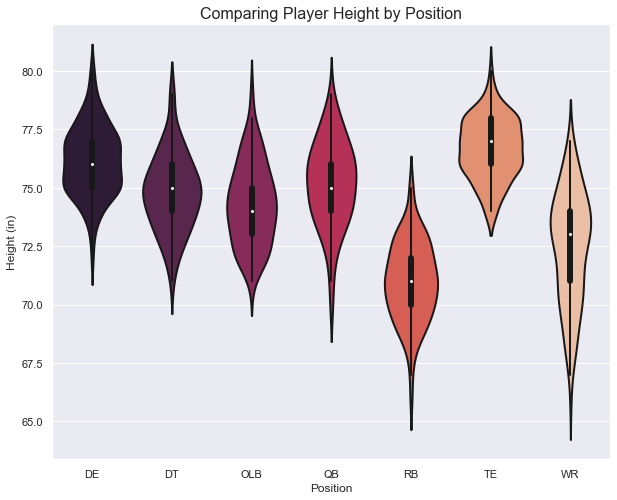

In [11]:
# Violin plot of player height by position
sns.set(rc={'figure.figsize':(10,8)})
sns.set(color_codes=True)
sns.violinplot( x=df["Position"], y=df["height"], linewidth=2, palette="rocket")
plt.xlabel("Position")
plt.ylabel("Height (in)")
plt.title('Comparing Player Height by Position', fontsize = 16)
plt.show();

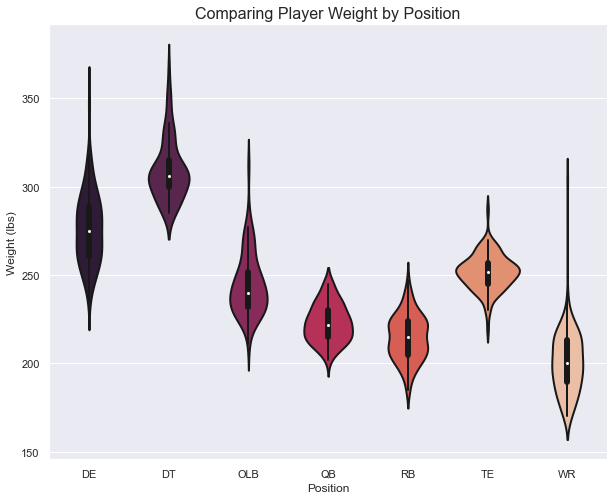

In [12]:
# Violin plot of player weight by position
sns.set(rc={'figure.figsize':(10,8)})
sns.set(color_codes=True)
sns.violinplot( x=df["Position"], y=df["weight"], linewidth=2, palette="rocket")
plt.xlabel("Position")
plt.ylabel("Weight (lbs)")
plt.title('Comparing Player Weight by Position', fontsize = 16)
plt.show();

### Generating Dummy Data

There are several options for creating dummy data in Python. Passing Yards and Touchdowns are highly correlated. I’m using NumPy's random.multivariate_normal to create correlated random samples from a multivariate normal distribution. Here’s a reference to the official doc.
The parameters required are mean, cov, and size. Mean is the mean of each dimension of data. Cov is a covariance matrix of the distribution. Size is the size and/or shape of the sample.
Building the covariance matrix is a little tricky. I used the variance of yards and touchdowns on one diagonal and the standard deviations x the correlation on the other diagonal.

Covariance Matrix

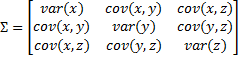

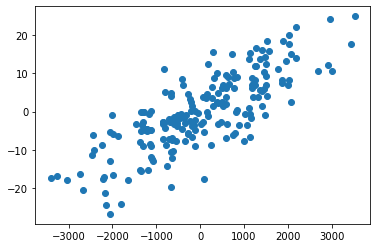

In [5]:
yd = np.array([-4000, 4000])
td = np.array([-30, 30])
means = [yd.mean(), td.mean()]  
yd_std = yd.std()/3
td_std = td.std()/3
corr = 0.8         # correlation

covs = [[yd_std**2          , yd_std*td_std*corr], 
       [yd_std*td_std*corr,           td_std**2]] 

m = np.random.multivariate_normal(means, covs, 200).T
scatter(m[0], m[1])

In [6]:
df_passing_2 = pd.DataFrame({'Pass_Yd': m[0, :], 'Pass_TD': m[1, :]})

In [7]:
df_passing_2

,Pass_Yd,Pass_TD
0,-627.328734,-10.265449
1,524.623073,7.034909
2,-1118.187953,-8.897035
3,490.195721,2.395154
4,-843.100298,-3.217894
...,...,...
195,-1871.531405,-6.303868
196,-408.632178,-4.657283
197,1169.868606,8.704562
198,415.827847,4.863139


In [8]:
df_passing_2.describe()

,Pass_Yd,Pass_TD
count,200.000000,200.000000
mean,5.234970,-0.121687
std,1341.775109,9.845601
min,-3410.712473,-26.701057
25%,-838.552002,-5.812468
50%,-112.109345,-0.827941
75%,1114.178946,6.857196
max,3525.102966,24.879474


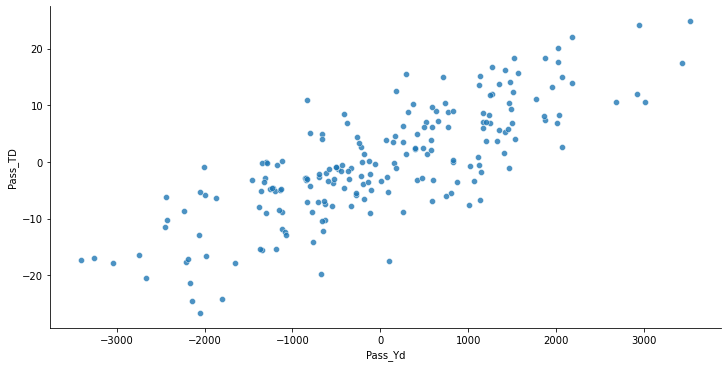

In [9]:
# scatter chart of QB Rating by Pass Yards
sns.relplot(x="Pass_Yd", y="Pass_TD", sizes=(100,50), alpha=.8, height=5, aspect=2, data=df_passing_2);

### Working with Dummy Data

In [ ]:
df_qbdum = pd.read_csv (r'Dummy_QB_Data.csv')
df_qbdum.head()

In [12]:
df_qbdum = pd.read_csv (r'Dummy_QB_Data.csv')
df_qbdum.head(8)

,First,Last,is_Aaron,Pass_Yd,Pass_TD
0,Deshaun,Watson,0,4823,33
1,Patrick,Mahomes,0,4740,38
2,Tom,Brady,0,4633,40
3,Matt,Ryan,0,4581,26
4,Josh,Allen,0,4544,37
5,Justin,Herbert,0,4336,31
6,Aaron,Rodgers,1,4299,48
7,Kirk,Cousins,0,4265,35


In [11]:
df_qbdum.tail()

,First,Last,is_Aaron,Pass_Yd,Pass_TD
105,First,Last,0,2178,25
106,First,Last,0,2830,26
107,First,Last,0,3447,28
108,First,Last,0,2372,29
109,First,Last,0,3430,32


### QB Visualization

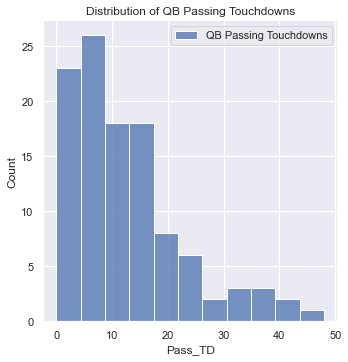

In [13]:
# Plot distribution of QB TD
sns.set(color_codes=True)
sns.set(rc={'figure.figsize':(10,8)})
sns.displot(df_qbdum['Pass_TD'], label='QB Passing Touchdowns') 
plt.title('Distribution of QB Passing Touchdowns')
plt.legend()
plt.show();

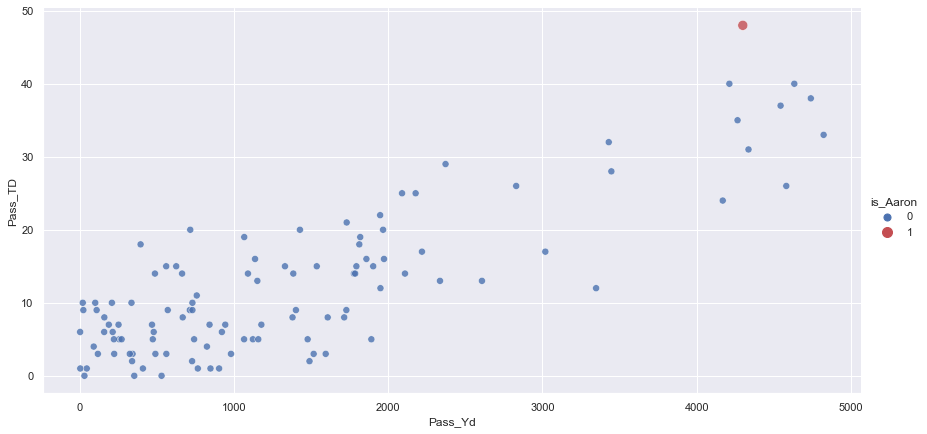

In [14]:
# scatter chart of QB Rating by Pass Yards
sns.relplot(x="Pass_Yd", y="Pass_TD", hue="is_Aaron", 
            size="is_Aaron", sizes=(100,50), palette=["b", "r"], alpha=.8, height=6, aspect=2, data=df_qbdum);

Aaron Rodgers is an outlier on both axes